---
title: Bayes-ball Part 3\: The credible interval and doing the math
mathjax: true
toc: true
toc_sticky: true
toc_label:  'Contents'
categories: [data science, statistics]
---

In the [last post](https://benslack19.github.io/data%20science/statistics/prior-and-beta/), we learned about the beta distribution and why it would be a more realistic prior in the context of our problem. We also selected appropriate $\alpha$ and $\beta$ hyperparameters. Now we need to add in the data, work out the math, and see what kind of posterior distribution would result. We will then close with discussion on the [credible interval](https://en.wikipedia.org/wiki/Credible_interval) and how to interpret it in this problem. 

Let's get started!

In [1]:
# Load packages for coding examples
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
sns.set_context('talk')   # visual theme

# Applying the data and getting the posterior easily

Let's remind ourselves that the beta distribution prior established in the last post resulted in hyperparameters of $\alpha_{0}$ and $\beta_{0}$  as 17.5 and 82.5, respectively. This is the same code I showed previously.

In [2]:
def plot_beta(a_val, b_val, label_val, color, ax):
    
    # Expected value of parameter
    mu = a_val / (a_val + b_val)
    
    # Lower, upper bounds of interval
    lower, upper = beta.ppf([0.025, 0.975], a_val, b_val)
    
    # Main plot
    x_val = np.arange(0, 1, 0.01)
    ax.plot(x_val, beta.pdf(x_val, a_val, b_val), color=color,
         lw=2, label=label_val)
    
    # Mark 0.25, 0.975 intervals
    #ax.axvline(mu, lw=0.5, color=color, linestyle='dashed', label='mean')
    ax.axvline(lower, ymax=1, color=color, linestyle='dashed', lw=0.5)  # Label once for cleaner legend
    ax.axvline(upper, ymax=1, color=color, linestyle='dashed', lw=0.5, label='95% bounds for ' + label_val)

a0, b0 values:  17.5 82.5


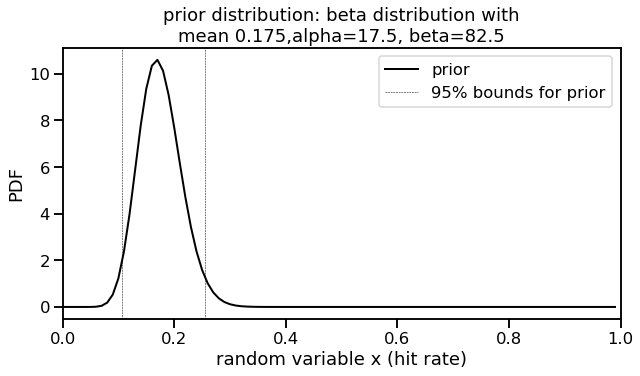

In [3]:
# Use a0 and b0 for our prior
mu = 0.175
total_ab = 100
a0 = mu*total_ab
b0 = total_ab-a0
print("a0, b0 values: ", a0, b0)

f, ax1 = plt.subplots(figsize=(10,5))
plot_beta(a0, b0, 'prior', 'black', ax1)
ax1.set_title('prior distribution: beta distribution with\nmean 0.175,alpha=17.5, beta=82.5')
ax1.set_xlim([0, 1])
ax1.set_xlabel('random variable x (hit rate)')
ax1.set_ylabel('PDF')
ax1.legend();

Now let's add in the data from the original problem but make it more interesting. The original problem had Aguila getting 18 hits in 100 at-bats, which would essentially be the mean that we found above. I don't think we would learn as much this way. Therefore, let's say instead that he goes on a small streak and **gets 20 hits in only 50 at-bats**, for a .400 batting average in that streak. The [Robinson post](http://varianceexplained.org/statistics/beta_distribution_and_baseball/) highlights that it can be very easy to get the posterior beta distribution. We only need to update the values of $\alpha$ and $\beta$ with the new "successes" (20) and "failures" (total new at-bats minus "successes" = 30). We will call these new values "a" and "b" below to distinguish from the "a0" and "b0" values of our prior.

In [4]:
# Posterior with updated alpha and beta values
a, b = 20, 30
a_post = a + a0
b_post = b + b0

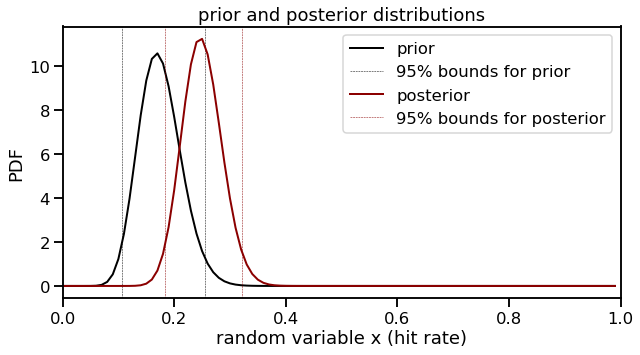

In [5]:
f, ax1 = plt.subplots(figsize=(10,5))

# Prior distribution plot
plot_beta(a0, b0, 'prior', 'black', ax1)

# Posterior distribution plot
plot_beta(a_post, b_post, 'posterior', 'darkred', ax1)

# Plot formatting
ax1.set_title('prior and posterior distributions')
ax1.set_xlim([0, 1])
ax1.set_xlabel('random variable x (hit rate)')
ax1.set_ylabel('PDF')
ax1.legend();

In [6]:
print("Expected value of posterior: ", a_post / (a_post + b_post))

Expected value of posterior:  0.25


In [7]:
print("95% credible interval: ", beta.ppf([0.025, 0.975], a_post, b_post))

95% credible interval:  [0.18424225 0.32207019]


We now have our posterior distribution! The expected value of this new distribution is 0.250 with a 95% **posterior prediction interval** of 0.184 and 0.322. This is also referred to as a [credible interval](https://en.wikipedia.org/wiki/Credible_interval). In a Bayesian framework, the parameter (hit rate in this case) is treated as a random variable with the bounds as fixed. We would expect Aguila's final hit rate to fall in this interval with 95% probability. 

My method for choosing the interval is an **equal-tailed interval**: 2.5% of the posterior probability distribution is above 0.322 and 2.5% of the distribution is below 0.184. An alternate method of taking the interval is to use the **highest posterior density (HPD)**. However, by looking at the plot, we can see that the distributions show symmetry and the bounds that would result from using HPD would not be too different from the equal-tailed approach. 

# A deeper understanding of the math

Creating an updated posterior distribution was easy to do . However, I felt a little bit unsatisified at this level of understanding. I went a little bit deeper as to why the beta distribution's $\alpha$ and $\beta$ terms can be updated with addition of the new data's number of successes and failures, respectively. In addition to other sources I have referenced, I found [this post](https://stats.stackexchange.com/questions/181383/understanding-the-beta-conjugate-prior-in-bayesian-inference-about-a-frequency) useful. Another excellent video which helped me look at Bayes theorem differently is [this video by 3Blue1Brown](https://www.youtube.com/watch?v=HZGCoVF3YvM).

Let's start simple with the textbook definition of Bayes again.

$\text{P}(A|B) = \frac{\text{P}(B|A)\text{P}(A)}{\text{P}(B)}$

Now let's translate these terms into words and the context of our problem like we did in the previous post. One change we have to consider is that in [the original problem statement](https://benslack19.github.io/data%20science/statistics/b-bayes-ball/), we applied Bayes' Theorem towards a *point probability*. That is, we calculated a single, numerical value when we asked what probability would Aguila be in the T10 group. The prior was also a numerical value ("40% of all hitters were in the T10 group").

What we are doing in this iteration of the problem is applying Bayes' Theorem towards a *probability distribution*. Therefore, we would Bayes in a similar form as what we have above, but amended it to reflect a distribution as we are in this equation:

<p><span style="color:darkblue">
$f(x|\text{data}) = \frac{f(\text{data}|x)f(x)}{f(\text{data})}$
</span></p>
    
I'd like to make explicit what the "x" and "data" refer to in this equation. The "x" is the random variable that refers to the true talent hit rate for Aguila. In other tutorials, this might be referred to as $\theta$. The "data" is the observation that Aguila made 20 hits in 50 at-bats.

Let's work through these terms as we did in the previous post.

<p><span style="color:darkblue">$f(x|\text{data})$</span>  The posterior probability distribution, resulting from updating the prior after seeing data. The left side of the equation is what we are trying to work out. We are finding a function parameterized by a range of hit rates given the beta distribution we started with. </p>

The entire right side of the equation is information that we are given but is a little bit less intuitive to see.

<p><span style="color:darkblue">$f(\text{data}|x)$</span>  This is the likelihood or the sampling density for the data. We can work with the binomial probability mass function as we did originally:

$ = \binom n k x^k(1-x)^{n-k}$
<br>
As stated above, "x" is a random variable representing the hit rate. We already know the values of n and k. The number of trials (at-bats) is n=50 and the number of successes (hits) is k=20. One thing we can recognize is that the binomial coefficient portion of this term is a constant. Constants will be easier to deal with as we work out the math.
</p>

<p><span style="color:darkblue">$f(x)$</span>  This is our prior distribution, the beta distribution density function with the $\alpha_0$ and $\beta_0$ hyperparameters we had stated above.
    
$= \frac{x^{\alpha_0-1}(1-x)^{\beta_0-1} }{\text{B}(\alpha_0, \beta_0)}\$

The denominator, a beta function, is also a constant.
    
</p>

<p><span style="color:darkblue">$f(\text{data})$</span> This is all instances of observing the data, independent of the conditions. Functionally in this equation, it acts as a normalizing constant.

$= \int_0^1 f(\text{data}|x)f(x)dx$ 

One way I think about this is that it is like taking all possible values of a prior, multiplying by the likelihood, and then summing. We do not have to worry too much about this normalizing term as we'll see. For me it, helped to look at what this term was in the [original Bayes-ball problem](https://benslack19.github.io/data%20science/statistics/b-bayes-ball/#putting-it-all-together) or even in the [Bertrand's box paradox problem](https://benslack19.github.io/data%20science/statistics/a-bertrands-box/#bayesian-approach). 
</p>

## Calculating the likelihood

$f(\text{data}|x) = \binom n k x^k(1-x)^{n-k}$

One thing that helped me was recognizing again that the likelihood is also a distribution. To visualize, it requires inputting a range of "x" values that represent the hit rate.

In [8]:
x_input = np.arange(0, 1, 0.01)
likelihood_vals = binom(50, x_input).pmf(20)

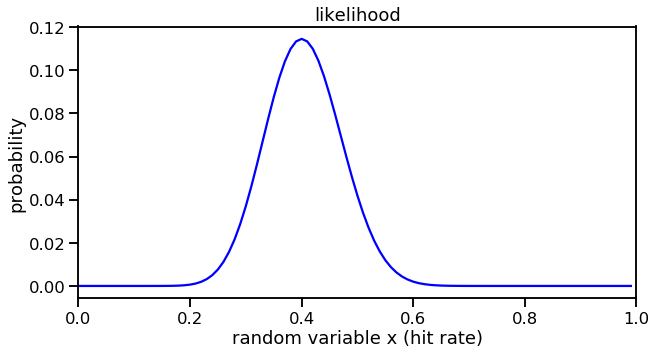

In [9]:
f, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(x_input, likelihood_vals, color='blue')
ax1.set_xlim([0, 1])
ax1.set_title('likelihood')
ax1.set_xlabel('random variable x (hit rate)')
ax1.set_ylabel('probability');

Not surprisingly, the most probable hit rate is at 0.4 which is the proportion of hits observed in Aguila's 50 at-bats.

## Calculating $f(\text{data})$

Let's re-state the equation for $f(\text{data})$, color-coding for terms that are substituted. We integrate between 0 and 1 for x because we want to sum all probabilities of hit rates where we would see the data (20 hits in 50 at-bats).

<p>
$f(\text{data})$ = $\int_0^1$ <span style="color:darkblue">$f(\text{data}|x)$ </span> <span style="color:darkred">$f(x)$ </span>$dx$
</p>

<p>
$f(\text{data})$ = $\int_0^1$ <span style="color:darkblue"> $\binom n k x^k(1-x)^{n-k}$ </span> <span style="color:darkred"> $\frac{x^{\alpha_0-1}(1-x)^{\beta_0-1} }{\text{B}(\alpha_0, \beta_0)}$
</span>$dx$
</p>

At this point, we can start to recognize the constants that can be pulled out of the integral.
<p>
$f(\text{data})$ = <span style="color:darkblue">$\binom n k$</span> <span style="color:darkred">$(1/\text{B}(\alpha_0, \beta_0)$</span>   $\int_0^1$ <span style="color:darkblue"> $ x^k(1-x)^{n-k}$ </span> <span style="color:darkred"> $x^{\alpha_0-1}(1-x)^{\beta_0-1}$
</span>$dx$
</p>

Now, we can see that there are common bases within the integral. We can write the integral term more simply by combining exponents. (You might begin to see how this can lead us to getting the posterior distribution easily. We will come back to this.)

<p>
$f(\text{data})$ = $\binom n k (1/\text{B}(\alpha_0, \beta_0)$ $\int_0^1$ $x^{k + \alpha_0-1}(1-x)^{n - k + \beta_0-1}$ $dx$
</p>

At this point, we can carry out the math, noting that we can plug in values directly for n, k, $\alpha_0$, and $\beta_0$. I will use scipy's integration function [`quad`](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) to evaluate the integral. The constants outside the integral can also be evaluated.

In [10]:
# test function
from scipy import integrate as integrate

def integral_function(x_val):  #a is a parameter, x is the variable I want to integrate over
    n_val = 50
    k_val = 20
    a0_val = 17.5
    b0_val = 82.5
    
    return (x_val**(k_val + a0_val - 1))*((1-x_val)**(n_val - k_val + b0_val - 1))

integration_result = integrate.quad(integral_function,0,1,)[0]
integration_result

1.1033963704275183e-37

In [11]:
import scipy.special as sc

def evaluate_constant_term():
    n_val = 50
    k_val = 20
    a0_val = 17.5
    b0_val = 82.5
    
    binom_coefficient = sc.binom(n_val, k_val)
    betafunc_coefficient = sc.beta(a0_val, b0_val)
    
    return (binom_coefficient * 1/betafunc_coefficient)

In [12]:
f_of_data = integration_result * evaluate_constant_term()
print(f_of_data)

0.0010812262386706384


We have a value for a normalizing constant but as you can see, it's really hard to say what it means, by itself. As others have shown, the constant terms will just cancel out in the whole equation. Let's work with this anyway to see if we can get the posterior distribution that we expect.

## Putting it all together

What's cool about evaluating $f(data)$ is that we already have the pieces in place for finding the joint distribution of the likelihood times the prior. The joint distribution is shown in the numerator of our Bayes' equation here.

$\frac{f(\text{data}|x)f(x)}{f(\text{data})}$

We can input a range of "x" values as we did before to evaluate the joint distribution.

In [13]:
def get_joint_dist():
    x_input = np.arange(0, 1, 0.01)
    n_val = 50
    k_val = 20
    a0_val = 17.5
    b0_val = 82.5
    const_term = evaluate_constant_term()
    
    return const_term*((x_input**(k_val + a0_val - 1))*((1-x_input)**(n_val - k_val + b0_val - 1)))

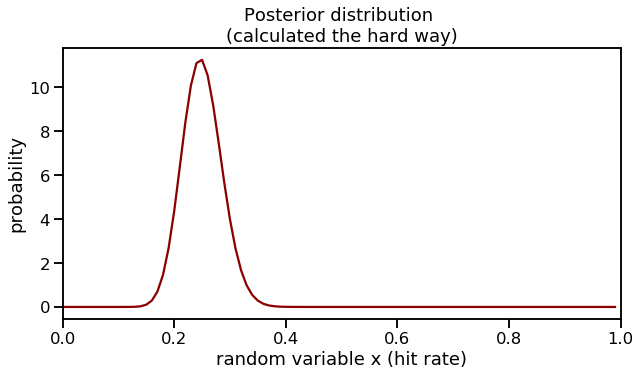

In [14]:
f, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(np.arange(0, 1, 0.01), (get_joint_dist() / f_of_data), color='darkred')
ax1.set_xlim([0, 1])
ax1.set_title('Posterior distribution \n(calculated the hard way)')
ax1.set_xlabel('random variable x (hit rate)')
ax1.set_ylabel('probability');

Look at that! We are able to re-create the posterior distribution from working through the math. We can also verify the expected value of this distribution is at 0.250 as we saw before.

In [15]:
# Find the x value where the probability is highest
for i, j in zip(np.arange(0, 1, 0.01), (get_joint_dist() / f_of_data)):
    if j == max((get_joint_dist() / f_of_data)):
        print("Expected value: ", i)

Expected value:  0.25


# Getting the equation for the posterior distribution

How can we get to the shortcut of the posterior beta distribution using only the number of successes and total events? At one point, we recognized common bases within the integral, leading to simple addition of exponents. But how **exactly** do we get to the posterior? Some posts appeared to get close to showing this explicitly but would skip explanation of a step. I found another helpful [post](https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af) that helped me finish putting all the pieces together.

I'd like to show the step-by-step equations again through color-coding the different parts of the Bayes theorem equation. However, I think I've reached the limits of MathJax functionality and I'll post a few images of carrying out the equation in hand-written form.

We can start simple and write out the starting form of the continuous version of Bayes theorem as we did below. (I have to admit, it's hard to write the integral sign with a marker.)

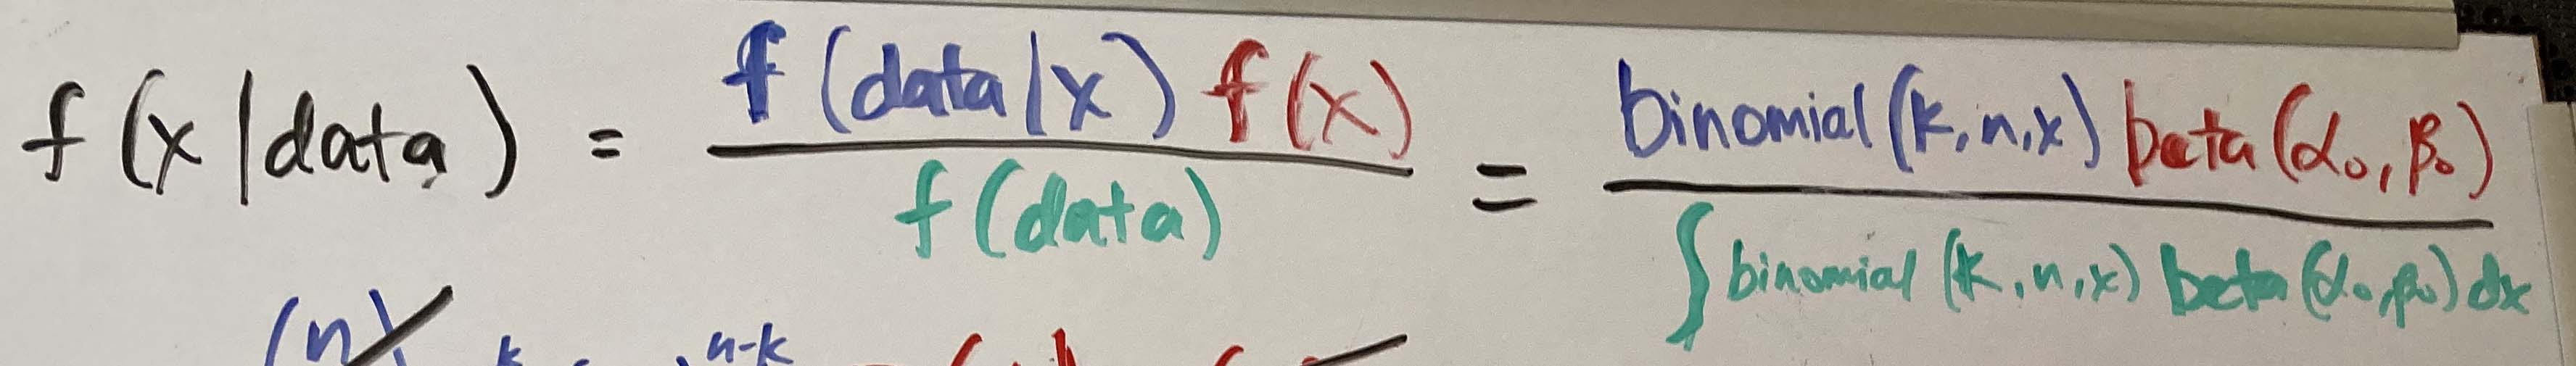

Then we can plug in the binomial likelihood and beta prior in the numerator and the integration term in the denominator.

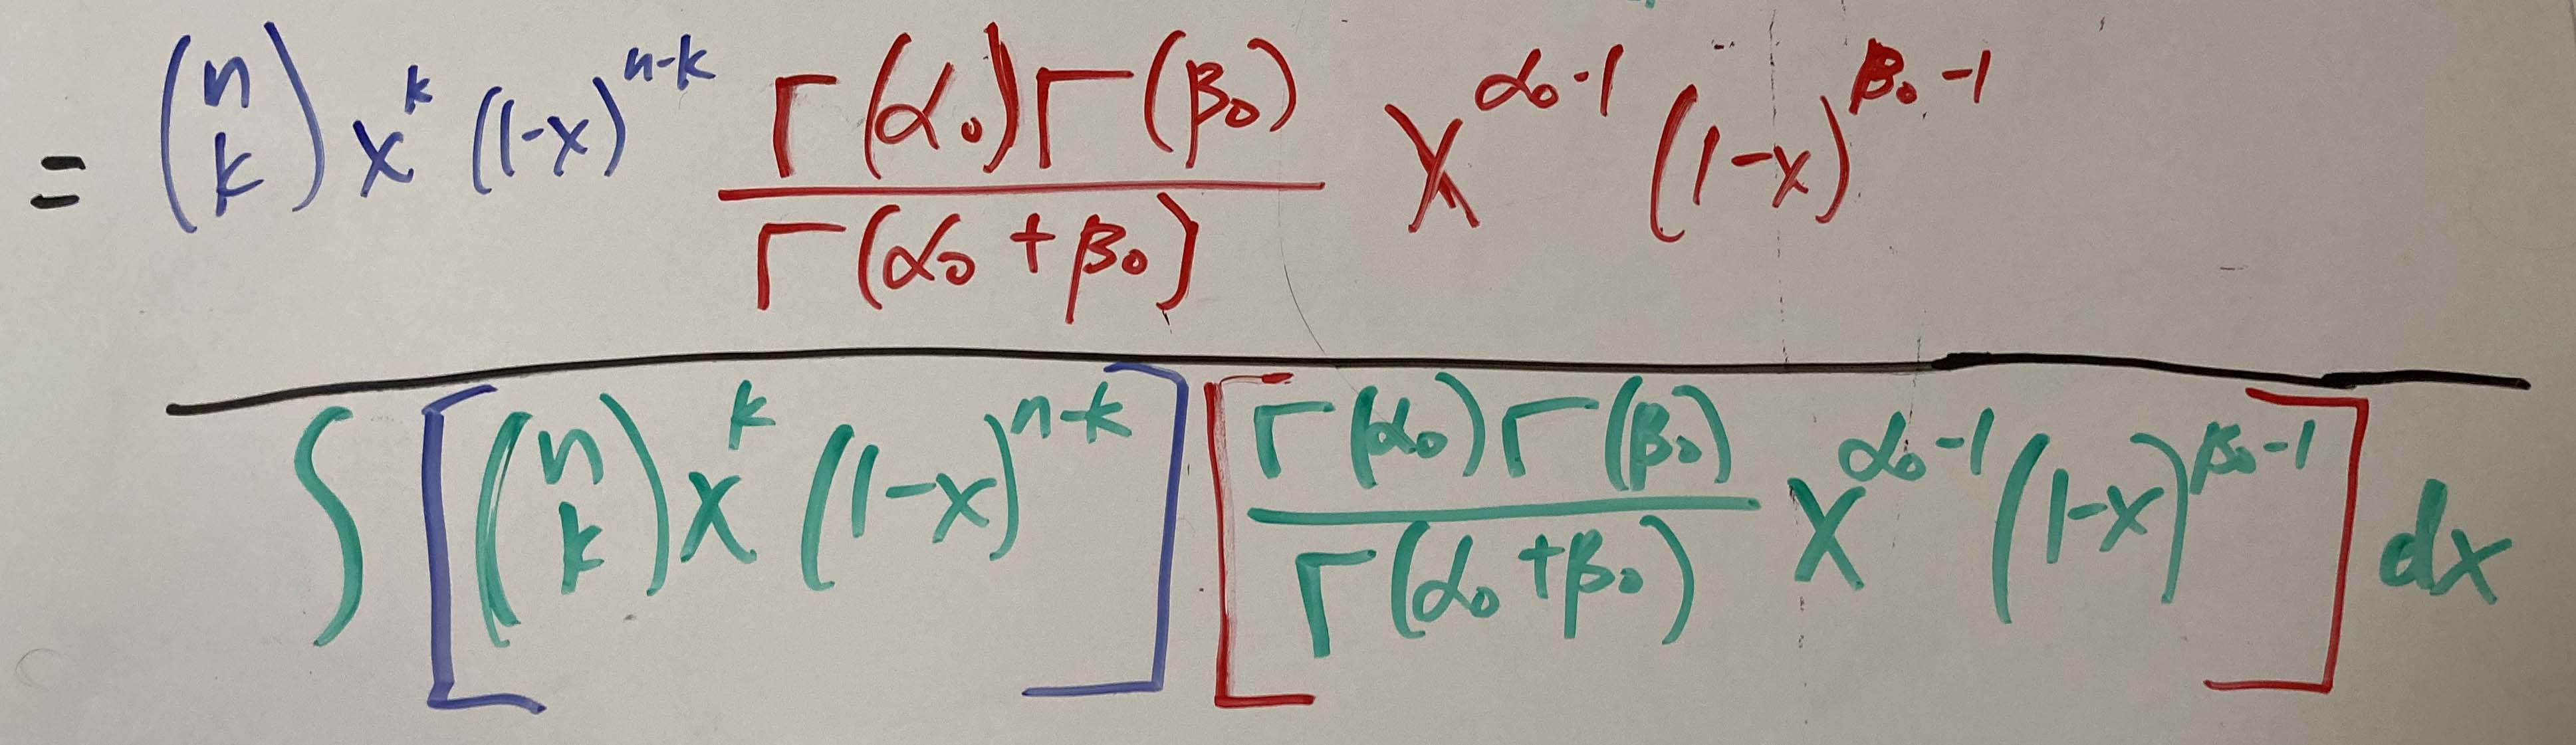

Now let's cancel out the constants.

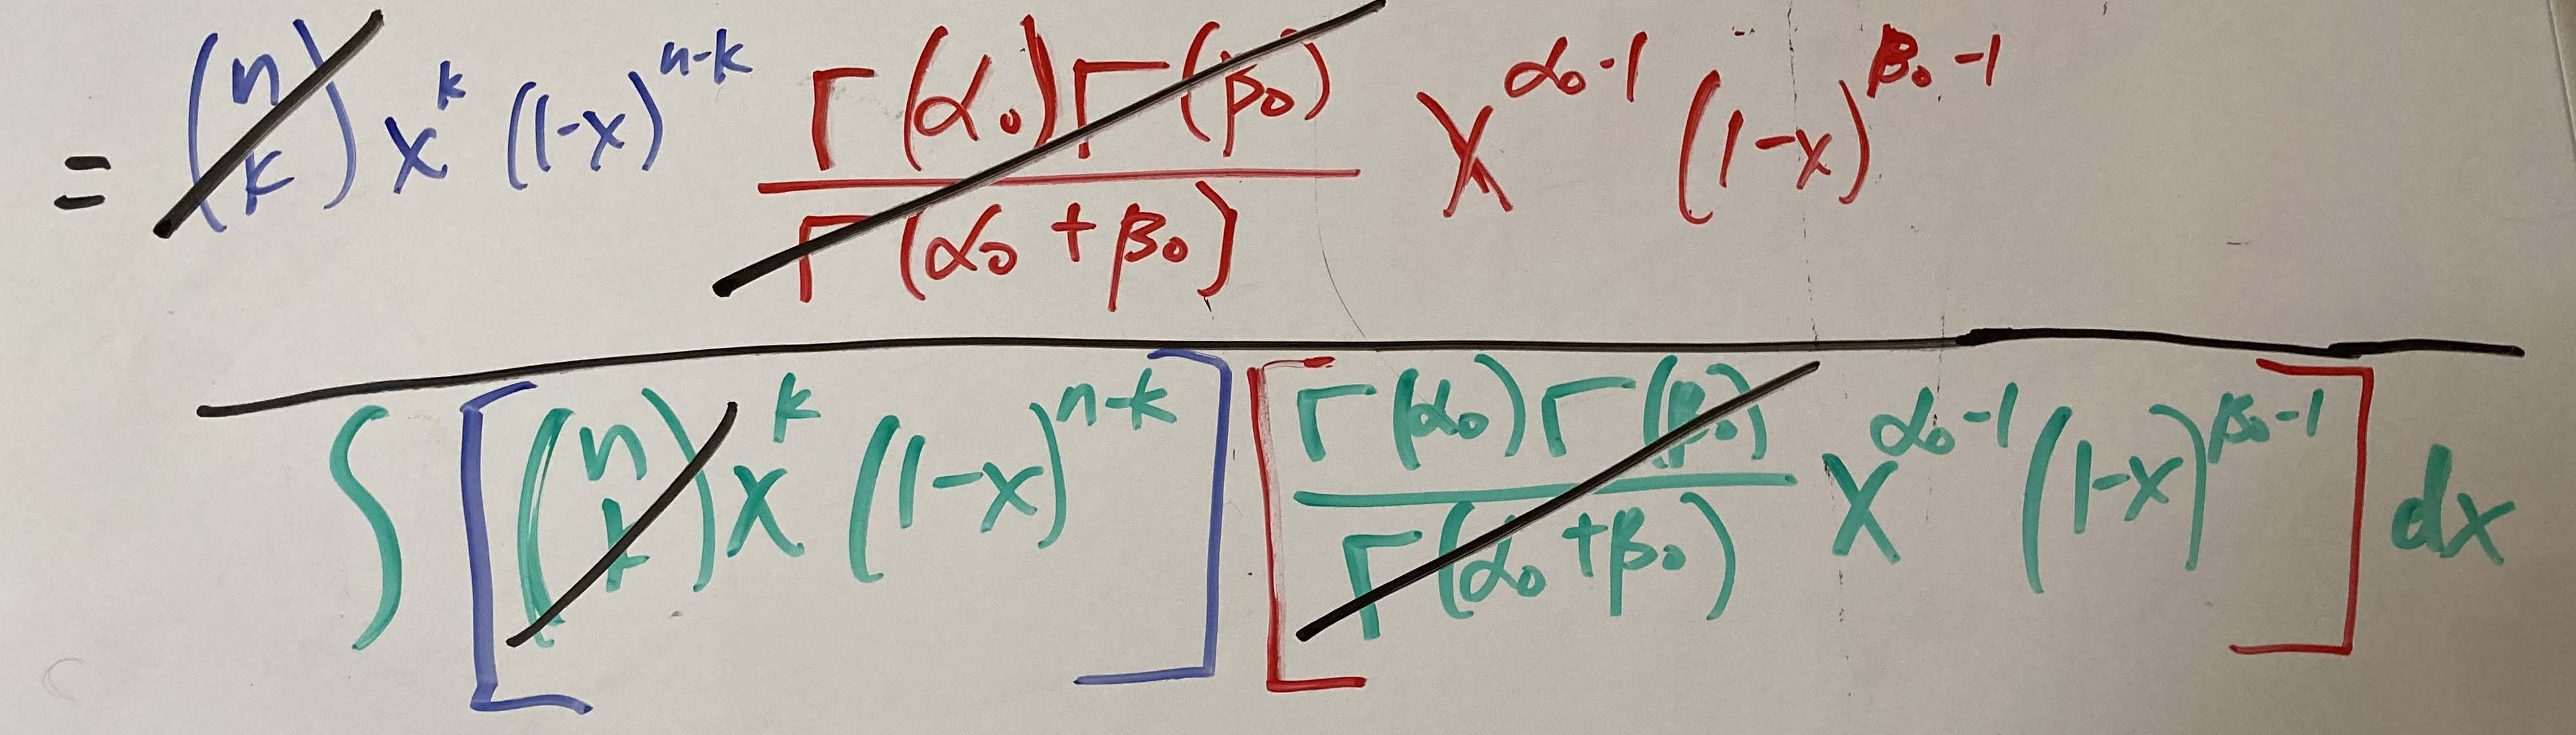

Simplify and add the exponent terms. (I forgot to add the dx in the denominator.)

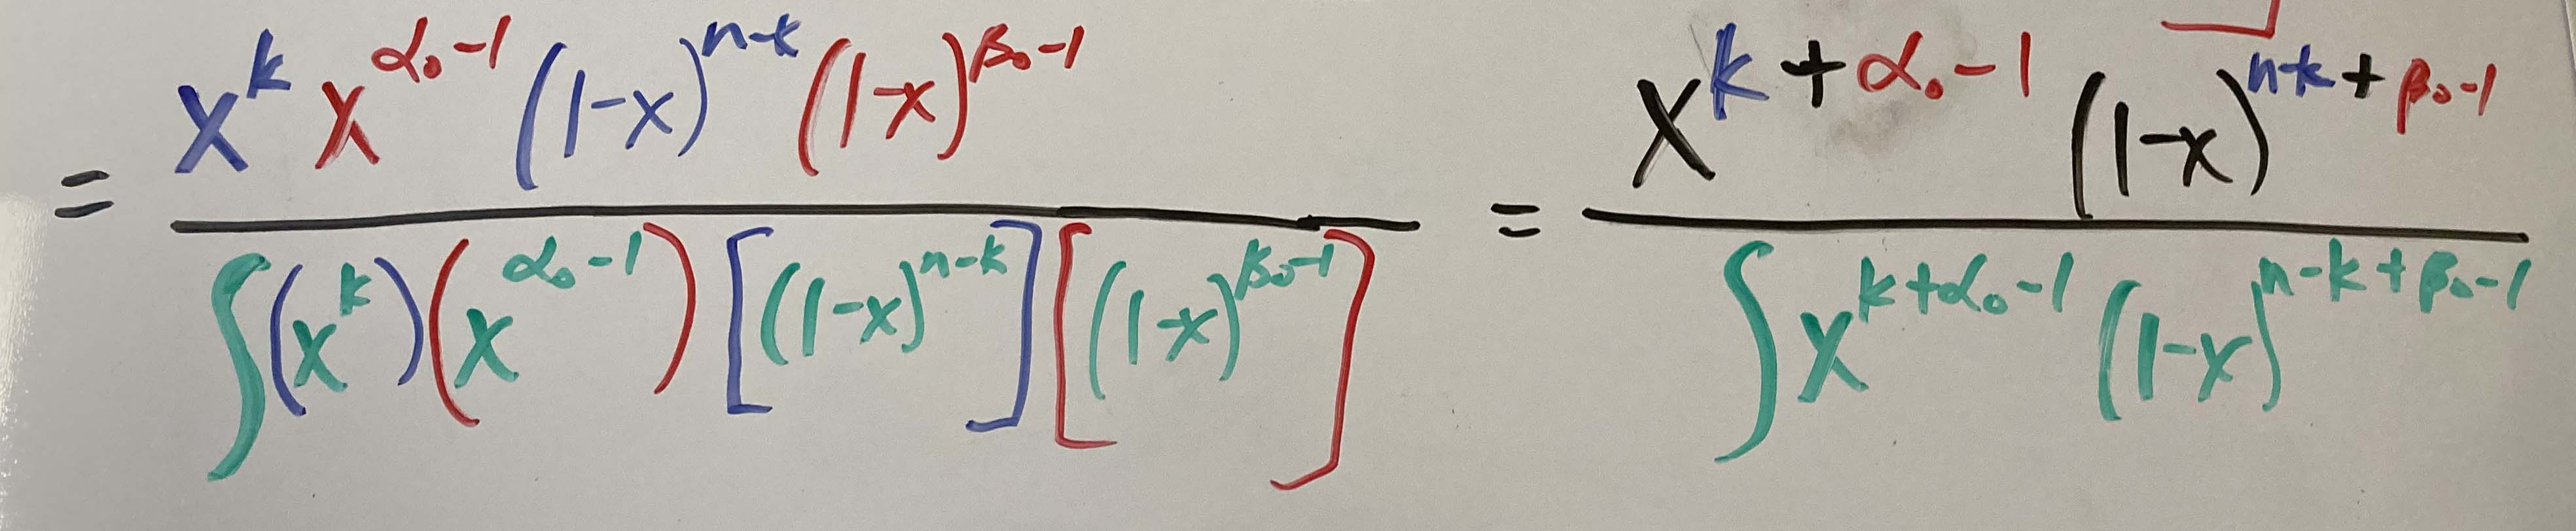

You can see that we're getting close to the form of the posterior. The denominator confused me. And then I saw one of the other posts demonstrate what this really is. I show it in the steps below. This is a general form so I use the "s" and "f" instead of $\alpha_0$ and $\beta_0$ to distinguish what I'm doing above.

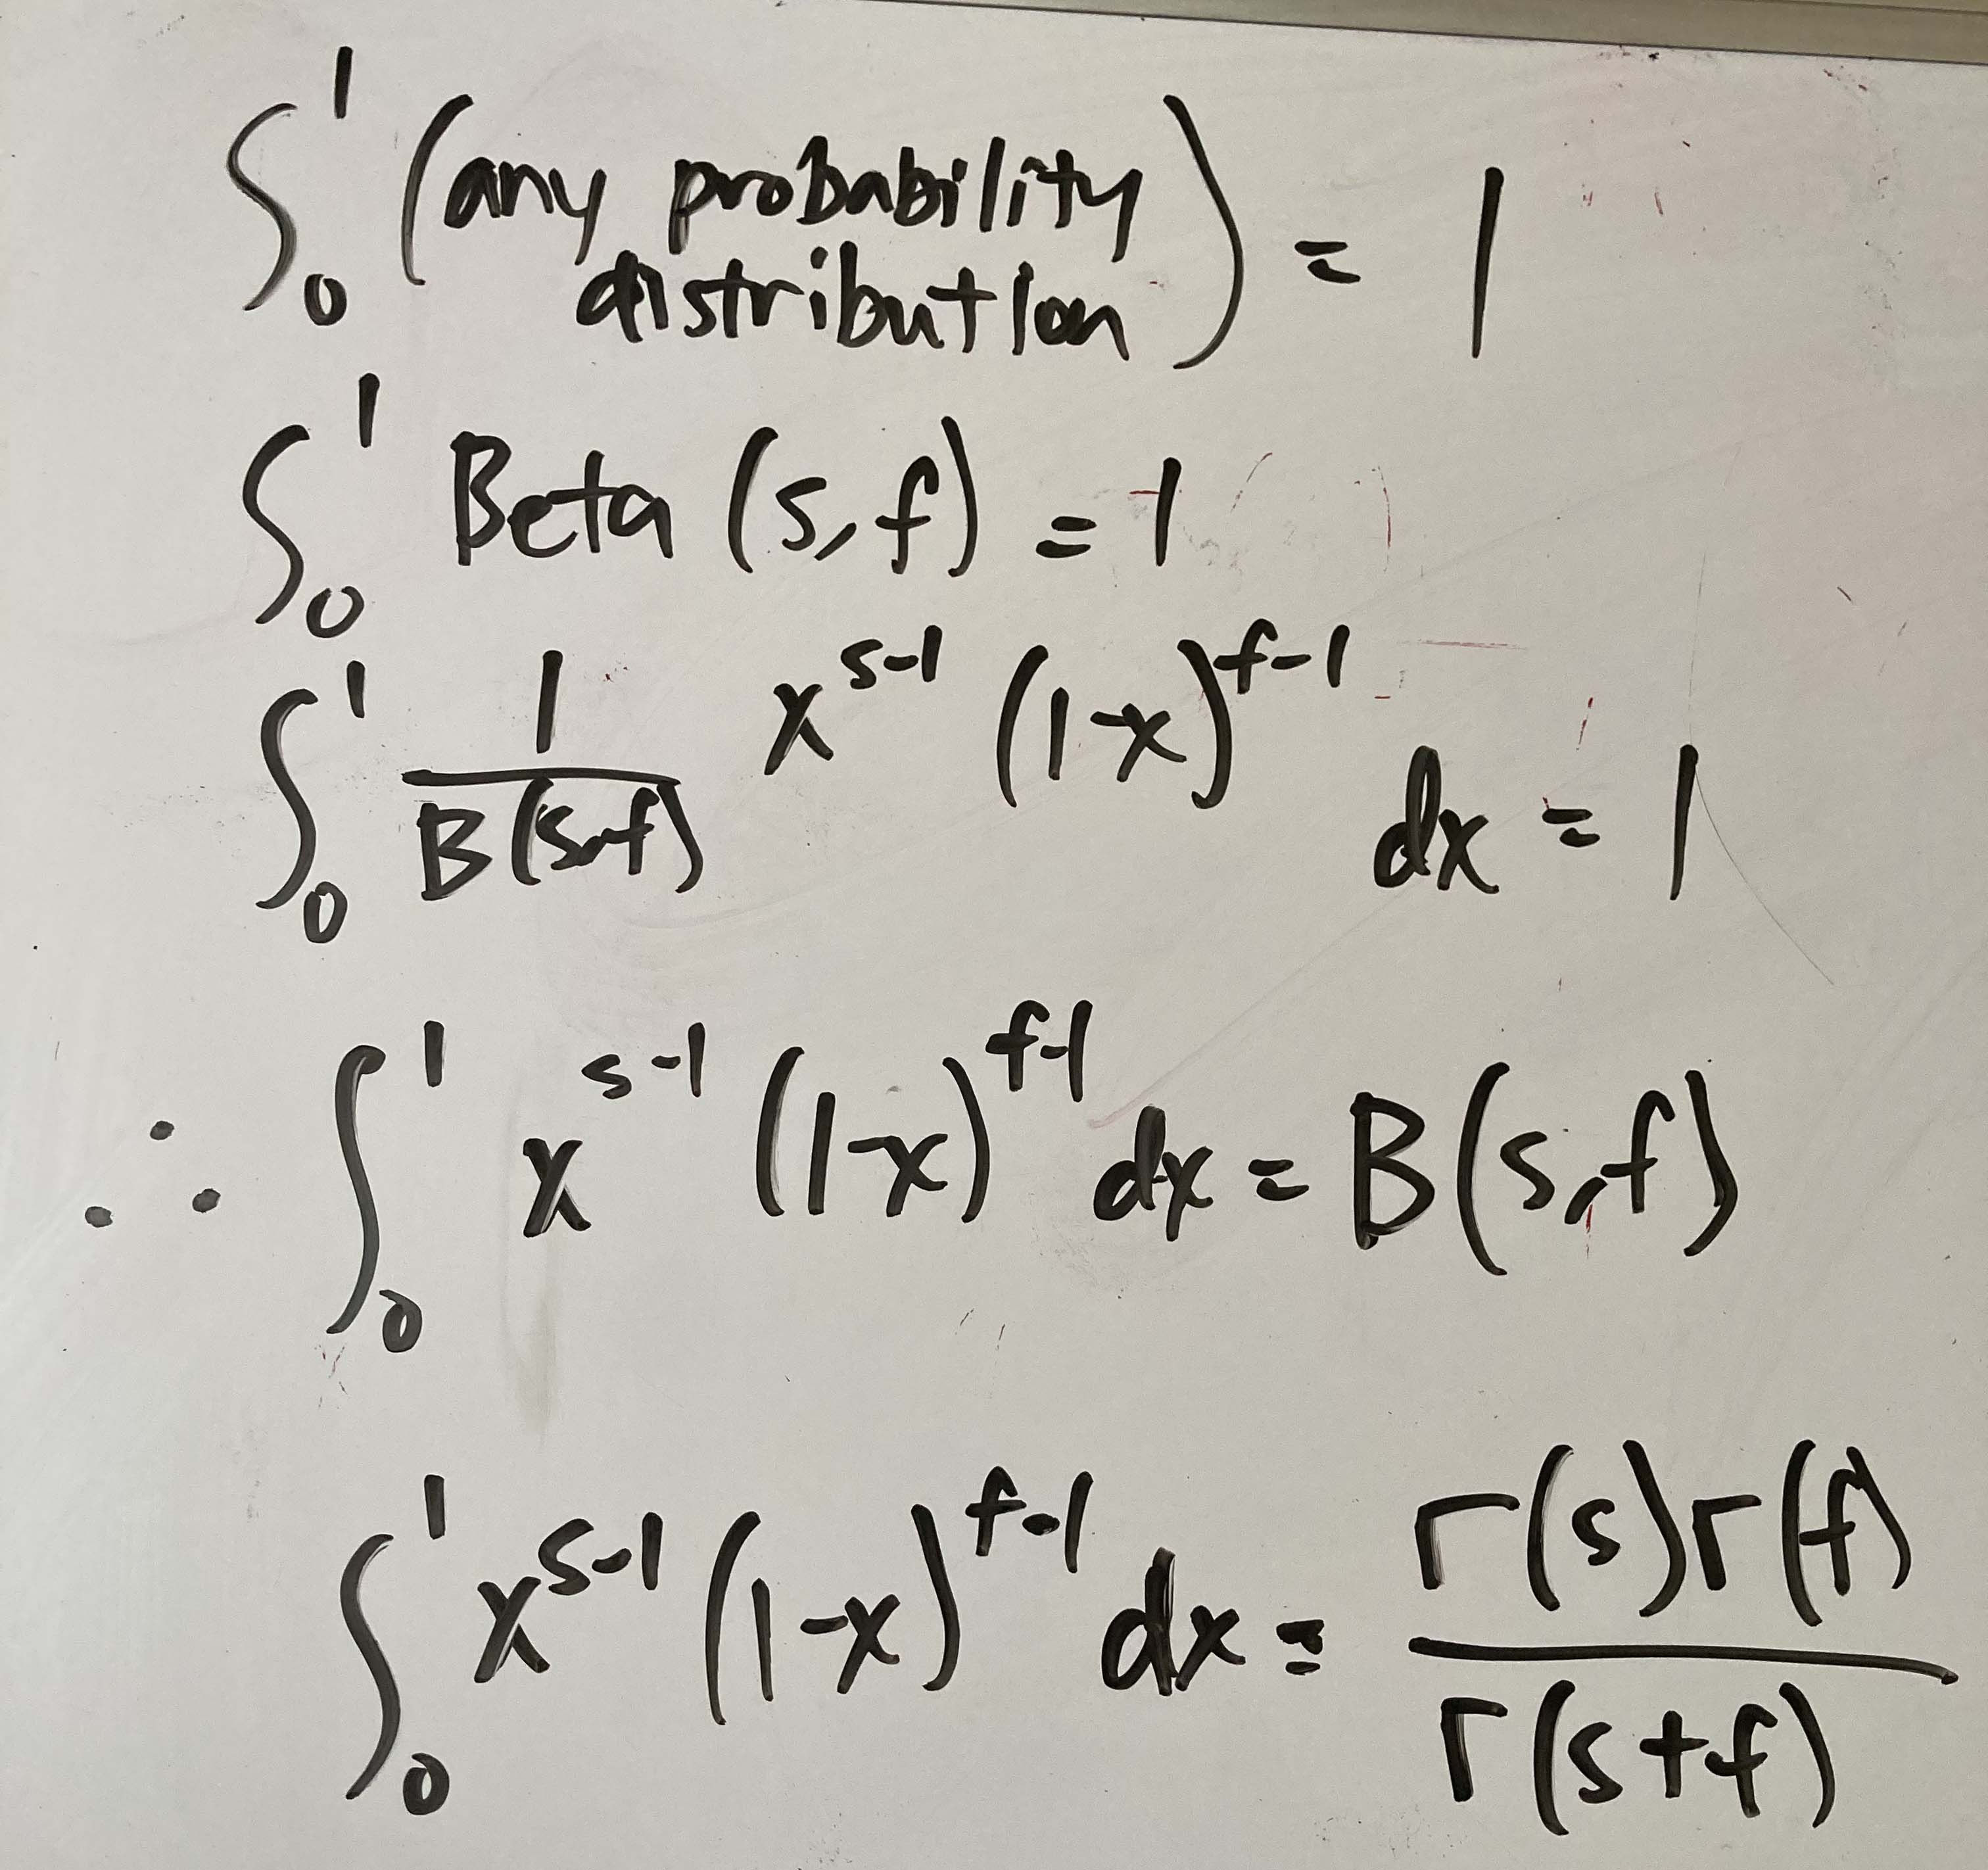

The integral term in the denominator is the beta function term.

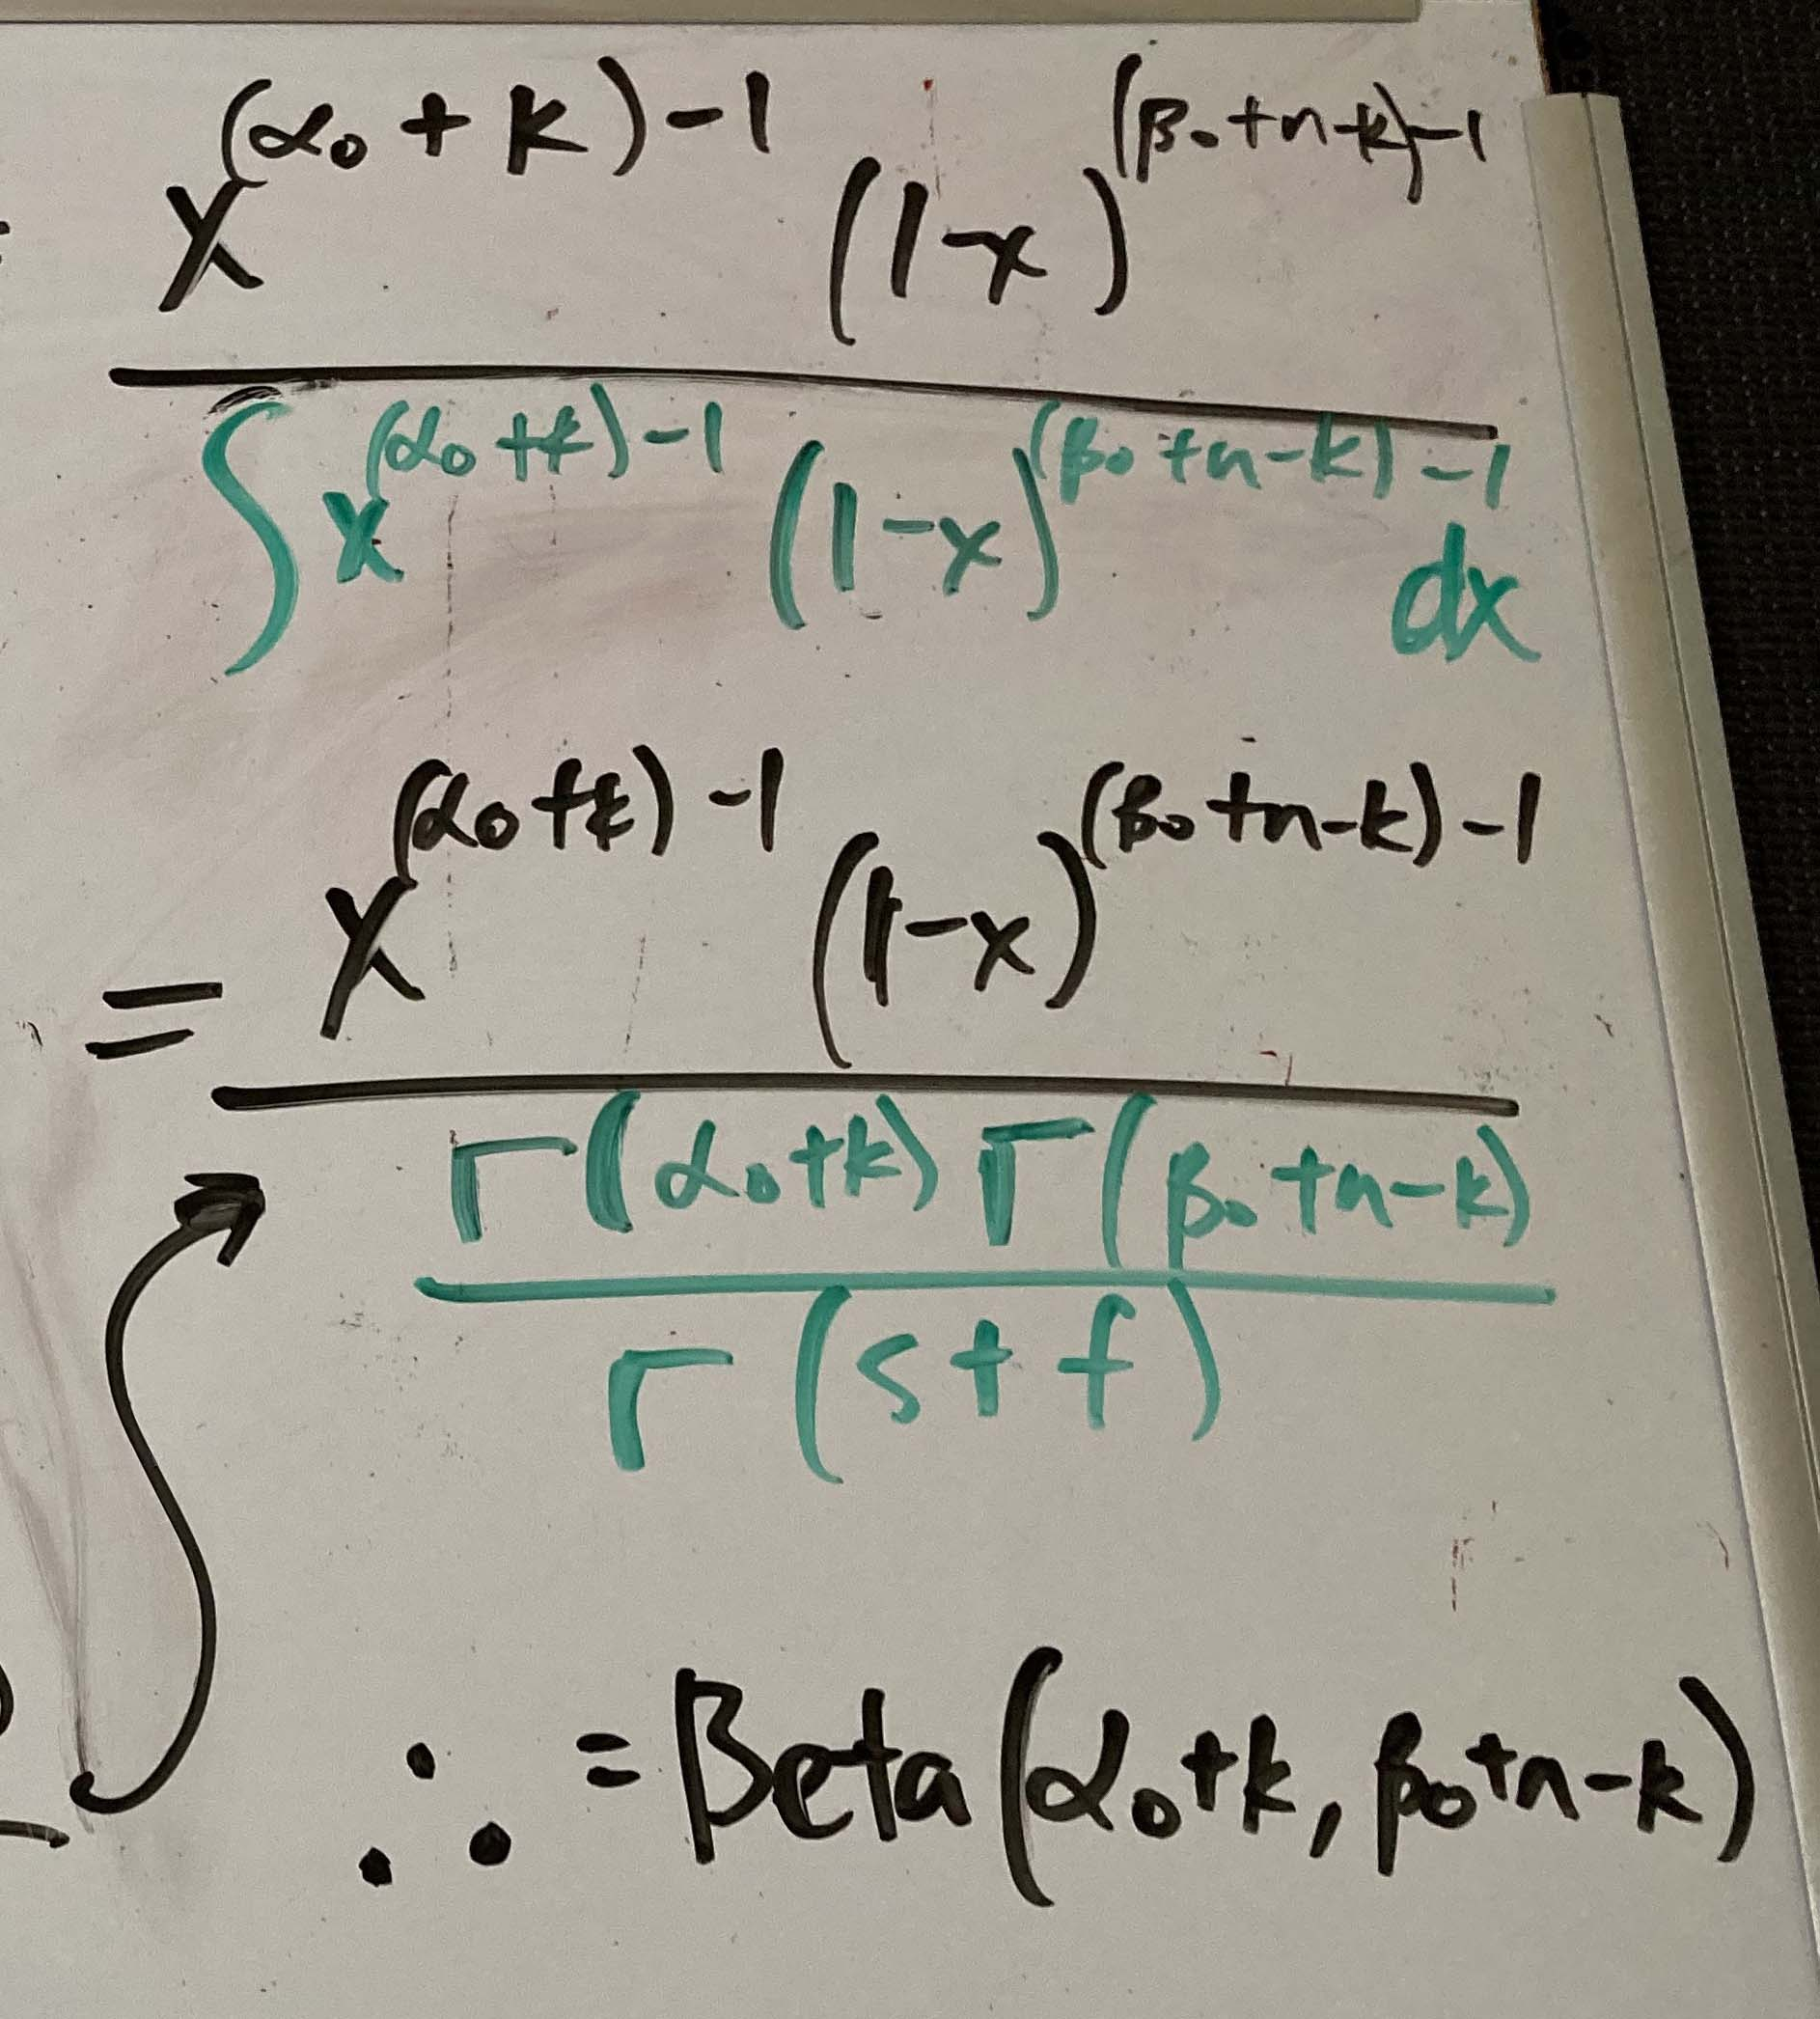

And this is how we get the posterior as a beta distribution parameterized by $\alpha_0$ + k and $\beta_0$ + n - k.

# Using Bayesian statistics to predict Tatis' hit rate

Writing this post and forcing myself to work through the math was a bit painful. However, this helped me find other sources about Bayesian statistics and think more deeply about the subject. In the end, understanding the concept is probably the point anyway.

But now we can have a little bit more fun with this. [Fernando Tatis](https://www.baseball-reference.com/players/t/tatisfe02.shtml) has had an incredible start to this season. He's been in the news quite a bit lately, especially with his [infamous grand slam on a 3-0 count](https://www.sandiegouniontribune.com/sports/padres/story/2020-08-17/padres-rangers-fernando-tatis-home-run-austin-hedges-zach-davies). Can we make a prediction on what his hit rate will be? (To the baseball fans: yes, I know hit rate is not a real thing. I am using this to simplify the problem.) The prior I will use will be a beta distribution paramaterized by his number of hits (106) and number of plate appearances without a hit (266) in the 2019 season. The binomial likelihood will be the number of hits (34) and plate appearances without a hit (75) as of today (8/21/20). (Today's game against the Astros is starting in 20 minutes as I type this.) 

In [18]:
a_Tatis_pre, b_Tatis_pre = 106, 266
a_Tatis_post, b_Tatis_post = a_Tatis_pre + 34, b_Tatis_pre + 75

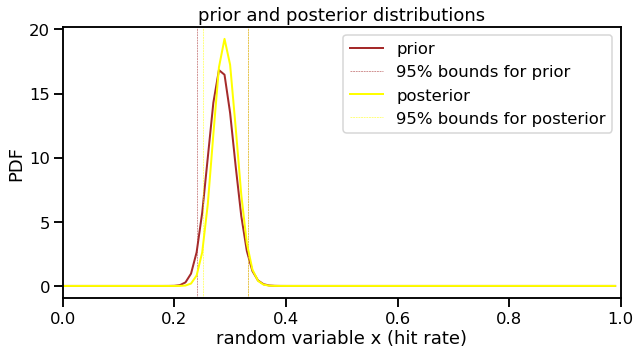

In [20]:
f, ax1 = plt.subplots(figsize=(10,5))

# Prior distribution plot
plot_beta(a_Tatis_pre, b_Tatis_pre, 'prior', 'brown', ax1)

# Posterior distribution plot
plot_beta(a_Tatis_post, b_Tatis_post, 'posterior', 'yellow', ax1)

# Plot formatting
ax1.set_title('prior and posterior distributions')
ax1.set_xlim([0, 1])
ax1.set_xlabel('random variable x (hit rate)')
ax1.set_ylabel('PDF')
ax1.legend();

In [27]:
print('Projected hit rate: {0:0.3f}'.format(a_Tatis_post/(a_Tatis_post+b_Tatis_post)))

Projected hit rate: 0.291


Tatis' hit rate does not to be significantly different from last year. But this is a very limited and superficial analysis. By other metrics, [he is even better than last year](https://fivethirtyeight.com/features/fernando-tatis-jr-was-already-mashing-then-he-started-hitting-the-ball-harder/) and is in [the MVP conversation](https://www.nbcsports.com/washington/nationals/nl-mvp-race-shaping-early-juan-soto-fernando-tatis-jr-among-standouts).